<a href="https://colab.research.google.com/github/GhazalehKeyvani/Avina/blob/main/MLCrashCourse/fa_intro_to_modeling_Data_Prepration_and_feature_enginiering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#اهداف آموزشی


> آشنایی با پانداس


> استفاده از


*   tf.Estimator
*   Feature column Api


*   visualization

> برای فهم ارزش تبدیل داده
















Importing our dependency

In [ ]:
import numpy as np
import pandas as pd
import math

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
#تنظیم نمایش خروجی پانداس تا یک رقم اعشار و محدود کردن آنها
#چاپ در 15  ردیف
pd.options.display.float_format = '{:.2f}'.format
pd.options.display.max_rows = 15

دیتاست با پانداس

In [ ]:
feature_names = ['symboling', 'normalized-losses', 'make', 'fuel-type',
        'aspiration', 'num-doors', 'body-style', 'drive-wheels',
        'engine-location', 'wheel-base', 'length', 'width', 'height', 'weight',
        'engine-type', 'num-cylinders', 'engine-size', 'fuel-system', 'bore',
        'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
        'highway-mpg', 'price']

car_data=pd.read_csv('https://storage.googleapis.com/mledu-datasets/cars_data.csv',
                     sep=',', names=feature_names, header=None, encoding='latin_1')

car_data= car_data.reindex(np.random.permutation(car_data.index))

print("Data set loaded. Num examples: ", len(car_data))


Data set loaded. Num examples:  205


استفاده از پانداس برای بازرسی داده و سرپرستی

> numric_feature_names


> categorical_feature_names





---
تمرین0: از پانداس برای کاوش و آماده سازی دیتا
استفاده کنید

>تابع های کاربردی



*   type()

*   dataframe[4:7]
*   dataframe[['mycol1', 'mycol2']]

>  Pandas dataframe

*   dataframe['mycol1']
*   dataframe.describe()


In [ ]:
car_data[4:7]

,symboling,normalized-losses,make,fuel-type,aspiration,num-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
76,2,161,mitsubishi,gas,std,two,hatchback,fwd,front,93.70,...,92,2bbl,2.97,3.23,9.40,68,5500,37,41,5389
181,-1,?,toyota,gas,std,four,wagon,rwd,front,104.50,...,161,mpfi,3.27,3.35,9.20,156,5200,19,24,15750
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.50,...,131,mpfi,3.13,3.40,7.00,160,5500,16,22,?


In [ ]:
LABEL='price'

numeric_feature_names = car_data[['symboling','normalized_losses','wheel-base','bore','stroke','compretion-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']]
categorical_feature_names = list(set(feature_names)) - set(numeric_faeture_names) - set([LABEL])

#
assert len(numeric_feature_names) == 15
assert len(categorical_feature_names) == 10

KeyError: ignored

In [ ]:
#@title Solution (to view code, from cell's menu, select Form -> راه حل)
numeric_feature_names = ['symboling', 'normalized-losses', 'wheel-base',
        'length', 'width', 'height', 'weight', 'engine-size', 'horsepower',
        'peak-rpm', 'city-mpg', 'highway-mpg', 'bore', 'stroke',
         'compression-ratio']

categorical_feature_names = list(set(feature_names) - set(numeric_feature_names) - set([LABEL]))

assert len(numeric_feature_names) == 15
assert len(categorical_feature_names) == 10

In [ ]:
car_data[numeric_feature_names]

,symboling,normalized-losses,wheel-base,length,width,height,weight,engine-size,horsepower,peak-rpm,city-mpg,highway-mpg,bore,stroke,compression-ratio
77,2,161,93.70,157.30,64.40,50.80,1944,92,68,5500,31,38,2.97,3.23,9.40
54,1,113,93.10,166.80,64.20,54.10,1950,91,68,5000,31,38,3.08,3.15,9.00
112,0,161,107.90,186.70,68.40,56.70,3252,152,95,4150,28,33,3.70,3.52,21.00
57,3,150,95.30,169.00,65.70,49.60,2385,70,101,6000,17,23,?,?,9.40
76,2,161,93.70,157.30,64.40,50.80,1918,92,68,5500,37,41,2.97,3.23,9.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,0,?,98.80,177.80,66.50,55.50,2443,122,64,4650,36,42,3.39,3.39,22.70
72,3,142,96.60,180.30,70.50,50.80,3685,234,155,4750,16,18,3.46,3.10,8.30
130,0,?,96.10,181.50,66.50,55.20,2579,132,?,?,23,31,3.46,3.90,8.70
58,3,150,95.30,169.00,65.70,49.60,2500,80,135,6000,16,23,?,?,9.40


In [ ]:
car_data[categorical_feature_names]

,num-doors,engine-location,num-cylinders,aspiration,fuel-type,fuel-system,drive-wheels,body-style,make,engine-type
77,two,front,four,std,gas,2bbl,fwd,hatchback,mitsubishi,ohc
54,four,front,four,std,gas,2bbl,fwd,sedan,mazda,ohc
112,four,front,four,turbo,diesel,idi,rwd,sedan,peugot,l
57,two,front,two,std,gas,4bbl,rwd,hatchback,mazda,rotor
76,two,front,four,std,gas,2bbl,fwd,hatchback,mitsubishi,ohc
...,...,...,...,...,...,...,...,...,...,...
63,?,front,four,std,diesel,idi,fwd,sedan,mazda,ohc
72,two,front,eight,std,gas,mpfi,rwd,convertible,mercedes-benz,ohcv
130,four,front,four,std,gas,mpfi,fwd,wagon,renault,ohc
58,two,front,two,std,gas,mpfi,rwd,hatchback,mazda,rotor


In [ ]:
for feature_name in numeric_feature_names + [LABEL]:
  car_data[feature_name] = pd.to_numeric(car_data[feature_name], errors='coerce')

car_data.fillna(0, inplace=True)

تمرین1: بهترین مدل تان را با ویژگی های عددی بسازید بدون استفاده از نرمالسازی



> مدل زیر را به کمترین مقدار loss تبدیل کنید
>Hyperparametrs



*   Larning rate

*   Choice of Optimizer

*   Hidden layer dimentions
*   num rating steps
*   batch size


*   هر چیز دیگری که فکر میکنید میتوان تغییر داد

بدون استفاده از
* normalizer_fn
* numeric_column



In [ ]:
#کد درست کار می کند اما به خاطرانتخاب نامناسب
#hyperparametrها
#NaN loss دریافت میکند

batch_size=16

print(numeric_feature_names)
x_df=car_data[numeric_feature_names]
y_series=car_data['price']


train_input_fn = tf.estimator.inputs.pandas_input_fn(
    x=x_df,
    y=y_series,
    batch_size=batch_size,
    num_epochs=None,
    shuffle=True
)
eval_input_fn = tf.estimator.inputs.pandas_input_fn(
    x=x_df,
    y=y_series,
    batch_size=batch_size,
    shuffle=False
)
predict_input_fn = tf.estimator.inputs.pandas_input_fn(
    x=x_df,
    batch_size=batch_size,
    shuffle=False
)

model_feature_columns = [
    tf.feature_column.numeric_column(feature_name) for feature_name in numeric_feature_names
]
print('model_feature_columns',model_feature_columns)

est = tf.estimator.DNNRegressor(
    feature_columns=model_feature_columns,
    hidden_units=[64],
    optimizer=tf.train.AdagradOptimizer(learning_rate=0.01),
  )

num_print_statements = 10
num_training_steps =10000
for _ in range(num_print_statements):
  est.train(train_input_fn, steps=num_training_steps // num_print_statements)

  scores = est.evaluate(eval_input_fn)


  print('score',scores)

['symboling', 'normalized-losses', 'wheel-base', 'length', 'width', 'height', 'weight', 'engine-size', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'bore', 'stroke', 'compression-ratio']



Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
Use tf.keras instead.


model_feature_columns [NumericColumn(key='symboling', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='normalized-losses', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='wheel-base', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='length', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='width', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='height', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='weight', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='engine-size', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='horsepower', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='peak-rpm', shape=(1,), default_value=None

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.


score {'average_loss': 38789110.0, 'label/mean': 12949.43, 'loss': 611674430.0, 'prediction/mean': 13342.108, 'global_step': 1000}


Instructions for updating:
Use standard file utilities to get mtimes.


score {'average_loss': 29960336.0, 'label/mean': 12949.43, 'loss': 472451460.0, 'prediction/mean': 13059.28, 'global_step': 2000}
score {'average_loss': 26569886.0, 'label/mean': 12949.43, 'loss': 418986660.0, 'prediction/mean': 13225.002, 'global_step': 3000}
score {'average_loss': 25188404.0, 'label/mean': 12949.43, 'loss': 397201760.0, 'prediction/mean': 13174.678, 'global_step': 4000}


Instructions for updating:
Use standard file APIs to delete files with this prefix.


score {'average_loss': 24543594.0, 'label/mean': 12949.43, 'loss': 387033600.0, 'prediction/mean': 13068.225, 'global_step': 5000}
score {'average_loss': 24179744.0, 'label/mean': 12949.43, 'loss': 381295970.0, 'prediction/mean': 13196.859, 'global_step': 6000}
score {'average_loss': 23913384.0, 'label/mean': 12949.43, 'loss': 377095680.0, 'prediction/mean': 12953.951, 'global_step': 7000}
score {'average_loss': 23679966.0, 'label/mean': 12949.43, 'loss': 373414850.0, 'prediction/mean': 13035.541, 'global_step': 8000}
score {'average_loss': 23471918.0, 'label/mean': 12949.43, 'loss': 370134080.0, 'prediction/mean': 13115.428, 'global_step': 9000}
score {'average_loss': 23264058.0, 'label/mean': 12949.43, 'loss': 366856320.0, 'prediction/mean': 13037.893, 'global_step': 10000}


مدلهای پیش بینی تان مصور سازی کنید

Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.


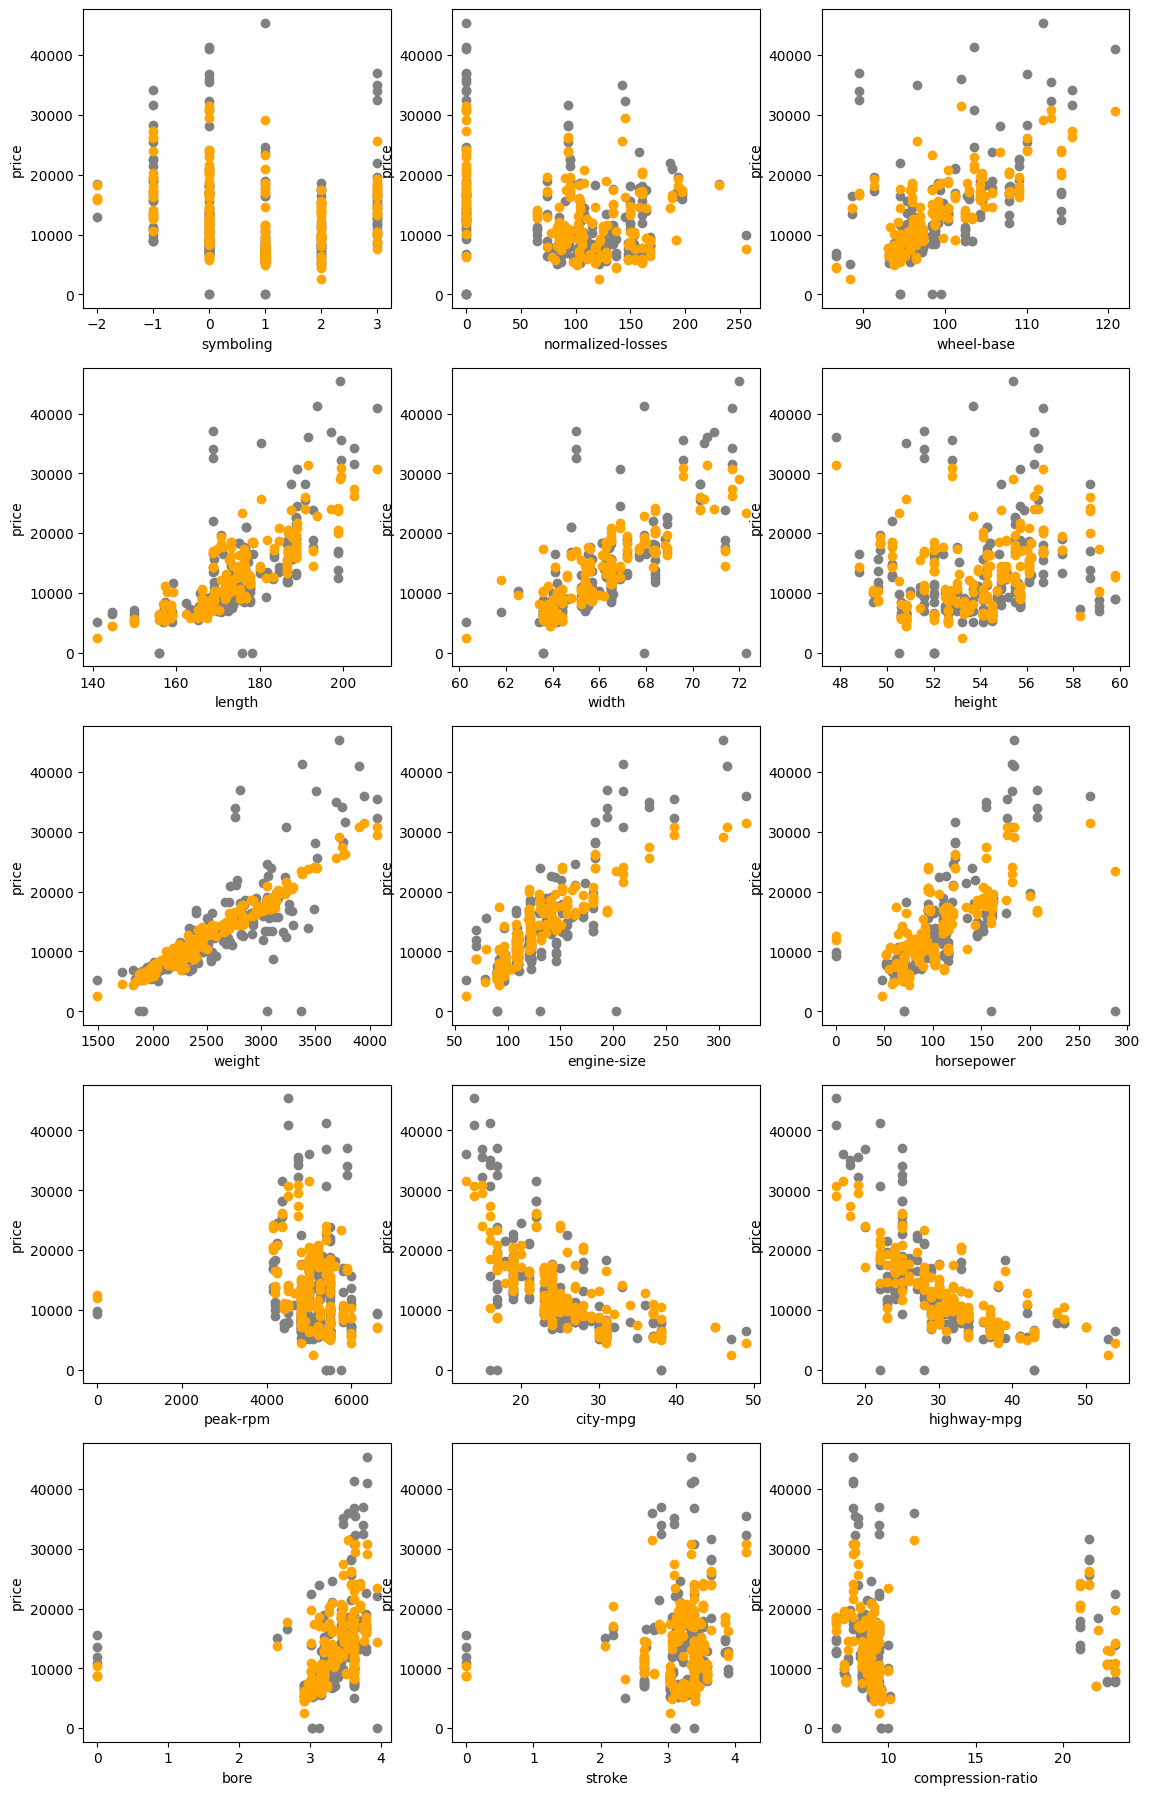

In [ ]:
from matplotlib import pyplot as plt

def scatter_plot_inference_grid(est,x_df,feature_names):



  def scatter_plot_inference(axis,
                            x_axis_feature_name,
                            y_axis_feature_name,
                            predictions):
    y_axis_feature_name='price'
    axis.set_ylabel(y_axis_feature_name)
    axis.set_xlabel(x_axis_feature_name)
    axis.scatter(car_data[x_axis_feature_name],
                 car_data[y_axis_feature_name],
                c='grey')


    axis.scatter(car_data[x_axis_feature_name],
                predictions ,c='orange')

  predict_input_fn=tf.estimator.inputs.pandas_input_fn(
      x=x_df,
      batch_size=batch_size,
      shuffle=False)

  predictions=[x['predictions'][0] for x in est.predict(predict_input_fn)]

  num_cols = 3
  num_rows = int(math.ceil(len(feature_names)/float(num_cols)))
  f, axarr = plt.subplots(num_rows, num_cols)
  size = 4.5
  f.set_size_inches(num_cols*size,num_rows*size)

  for i, feature_name in enumerate(numeric_feature_names):
    axis = axarr[int(i/num_cols),i%num_cols]
    scatter_plot_inference(axis, feature_name, 'price', predictions)
  plt.show()

scatter_plot_inference_grid(est,x_df,numeric_feature_names)

تمرین 2:نرمال سازی را در مدل عددی قبلیت اضافه کن


*   تصمیم بگیر که کدام نوع نرمال سازی را برای نرمال سازی هر ویژگی بیفزایی

*   normalizer_fn arg on numeric_column


> به عنوان مثال


>normalizer_fn = lambda x: tf.neg(tf.subtract(x, 1))





*   ممکن تابع های زیر از پانداس به کارتان بیاید


> dataframe.mean()['your_feature_name]

> dataframe.std()['your_feature_name]


*   باید هایپر پارامتر های قبلی را مجددا تنظیم کنید

آیا نرمال سازی کیفیت مدل را بهتر می کند؟ چرا؟



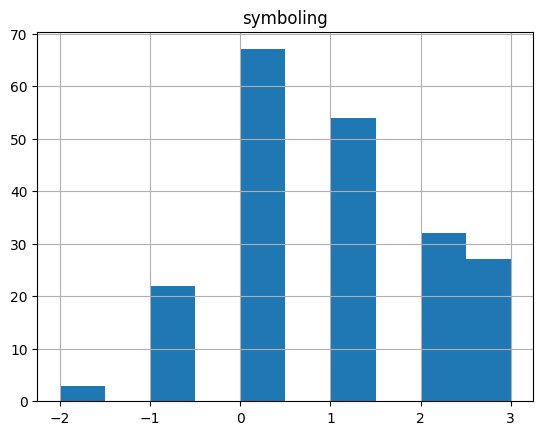

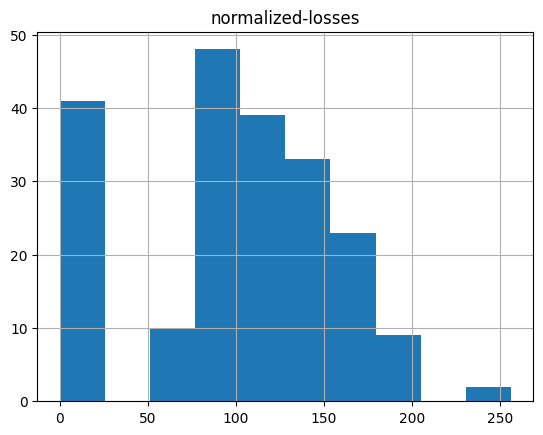

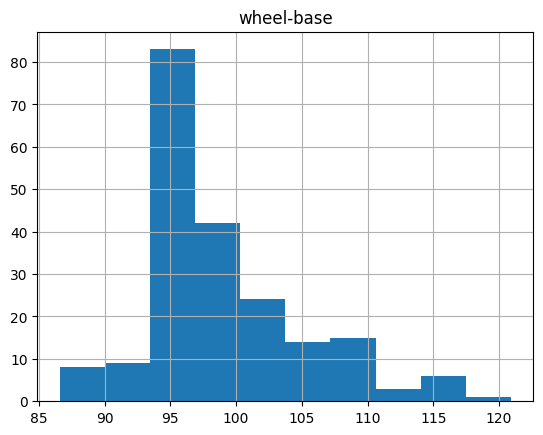

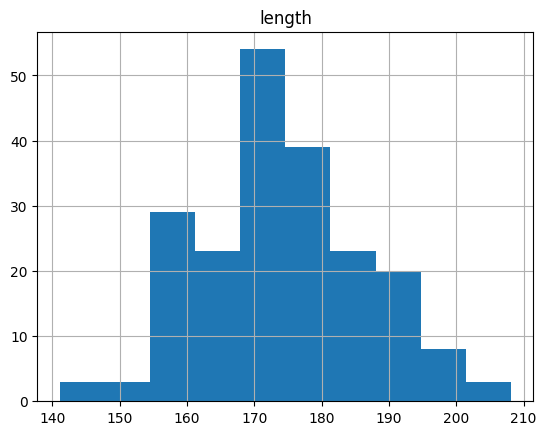

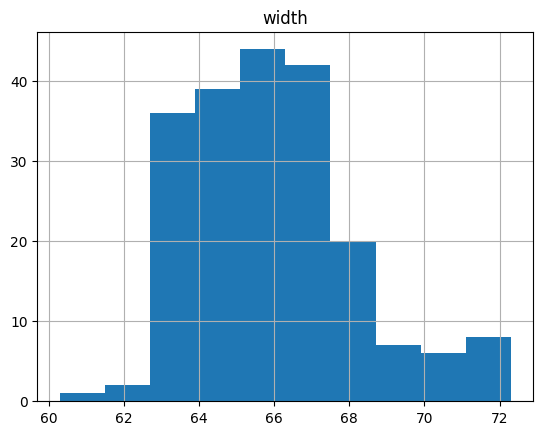

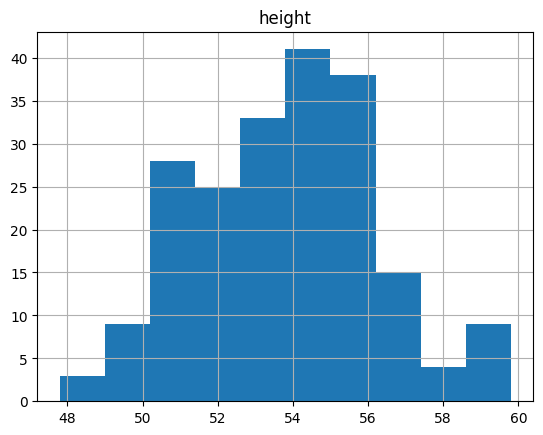

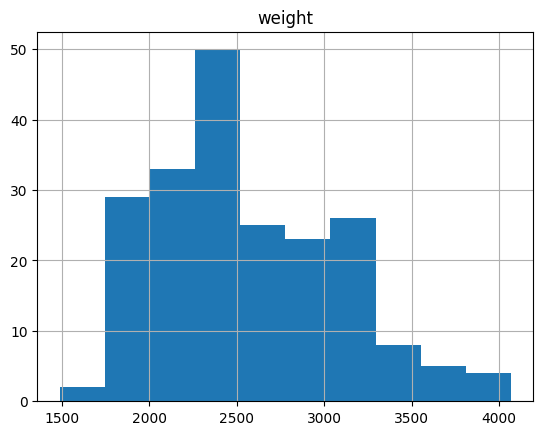

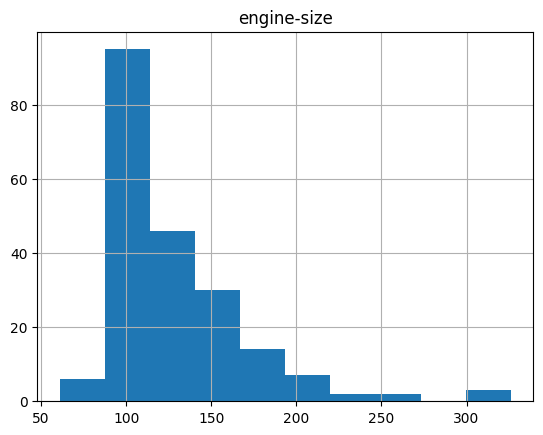

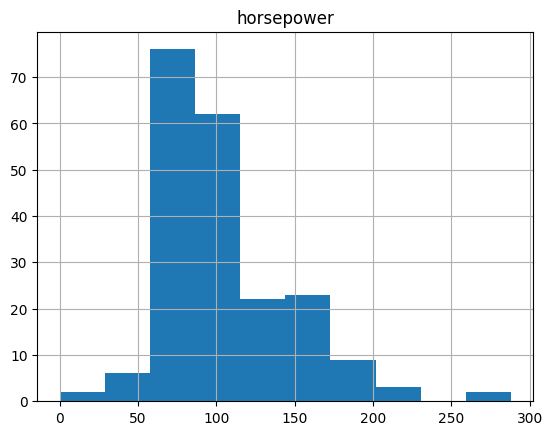

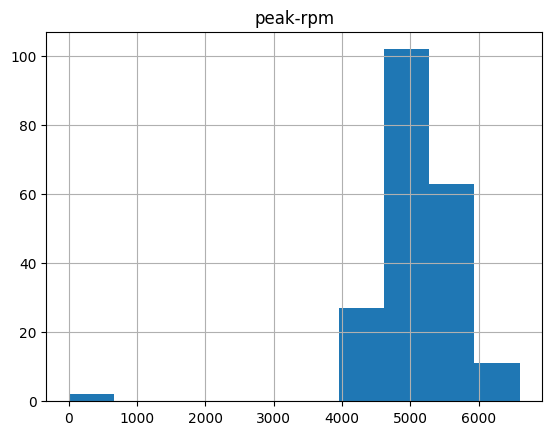

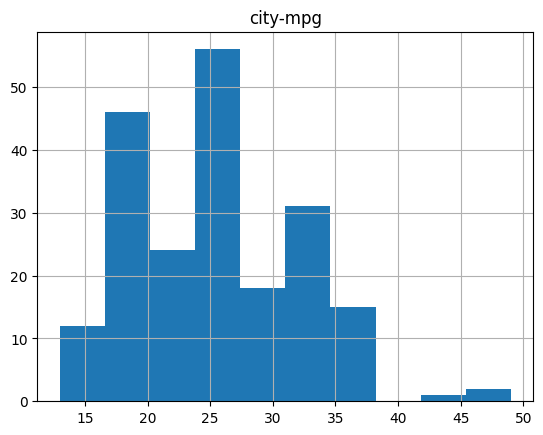

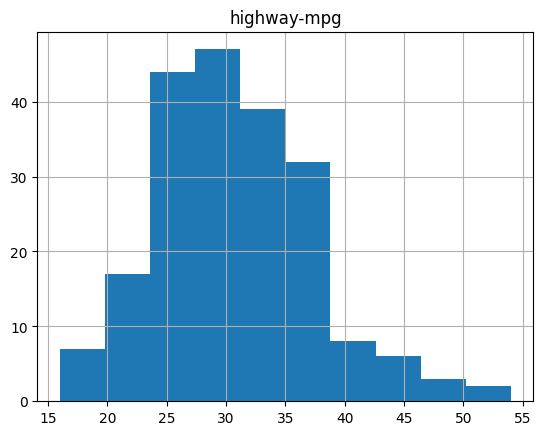

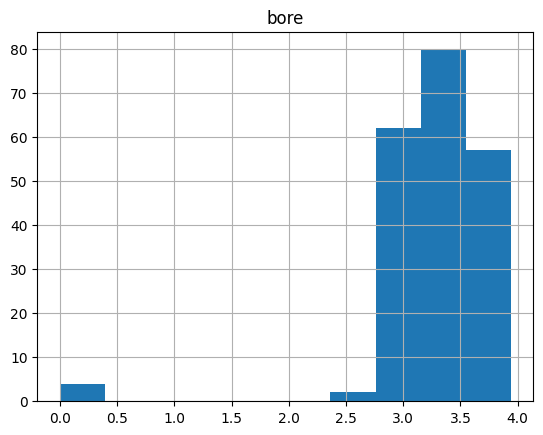

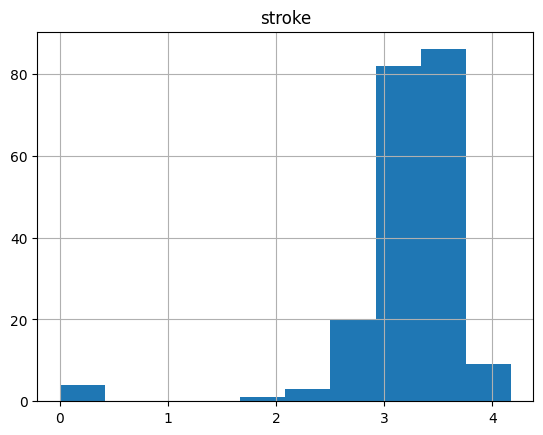

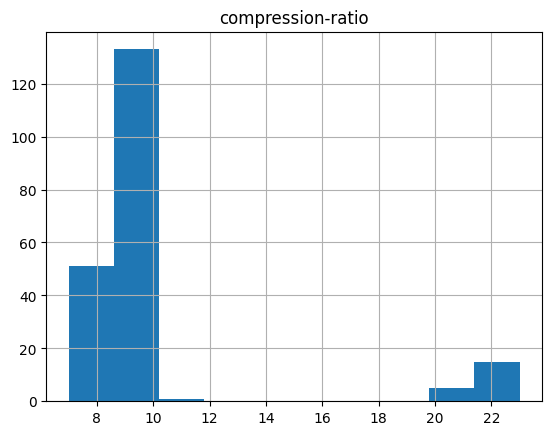

In [ ]:
for feature_name in numeric_feature_names:
  car_data.hist(column=feature_name)

['symboling', 'normalized-losses', 'wheel-base', 'length', 'width', 'height', 'weight', 'engine-size', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'bore', 'stroke', 'compression-ratio']
model_feature_columns [NumericColumn(key='symboling', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=<function <listcomp>.<lambda> at 0x7d555309f490>), NumericColumn(key='normalized-losses', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=<function <listcomp>.<lambda> at 0x7d555309fd00>), NumericColumn(key='wheel-base', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=<function <listcomp>.<lambda> at 0x7d555309c1f0>), NumericColumn(key='length', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=<function <listcomp>.<lambda> at 0x7d55602ffd90>), NumericColumn(key='width', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=<function <listcomp>.<lambda> at 0x7d55602ffeb0>), NumericColumn(key='height', shape=(1,), default_va

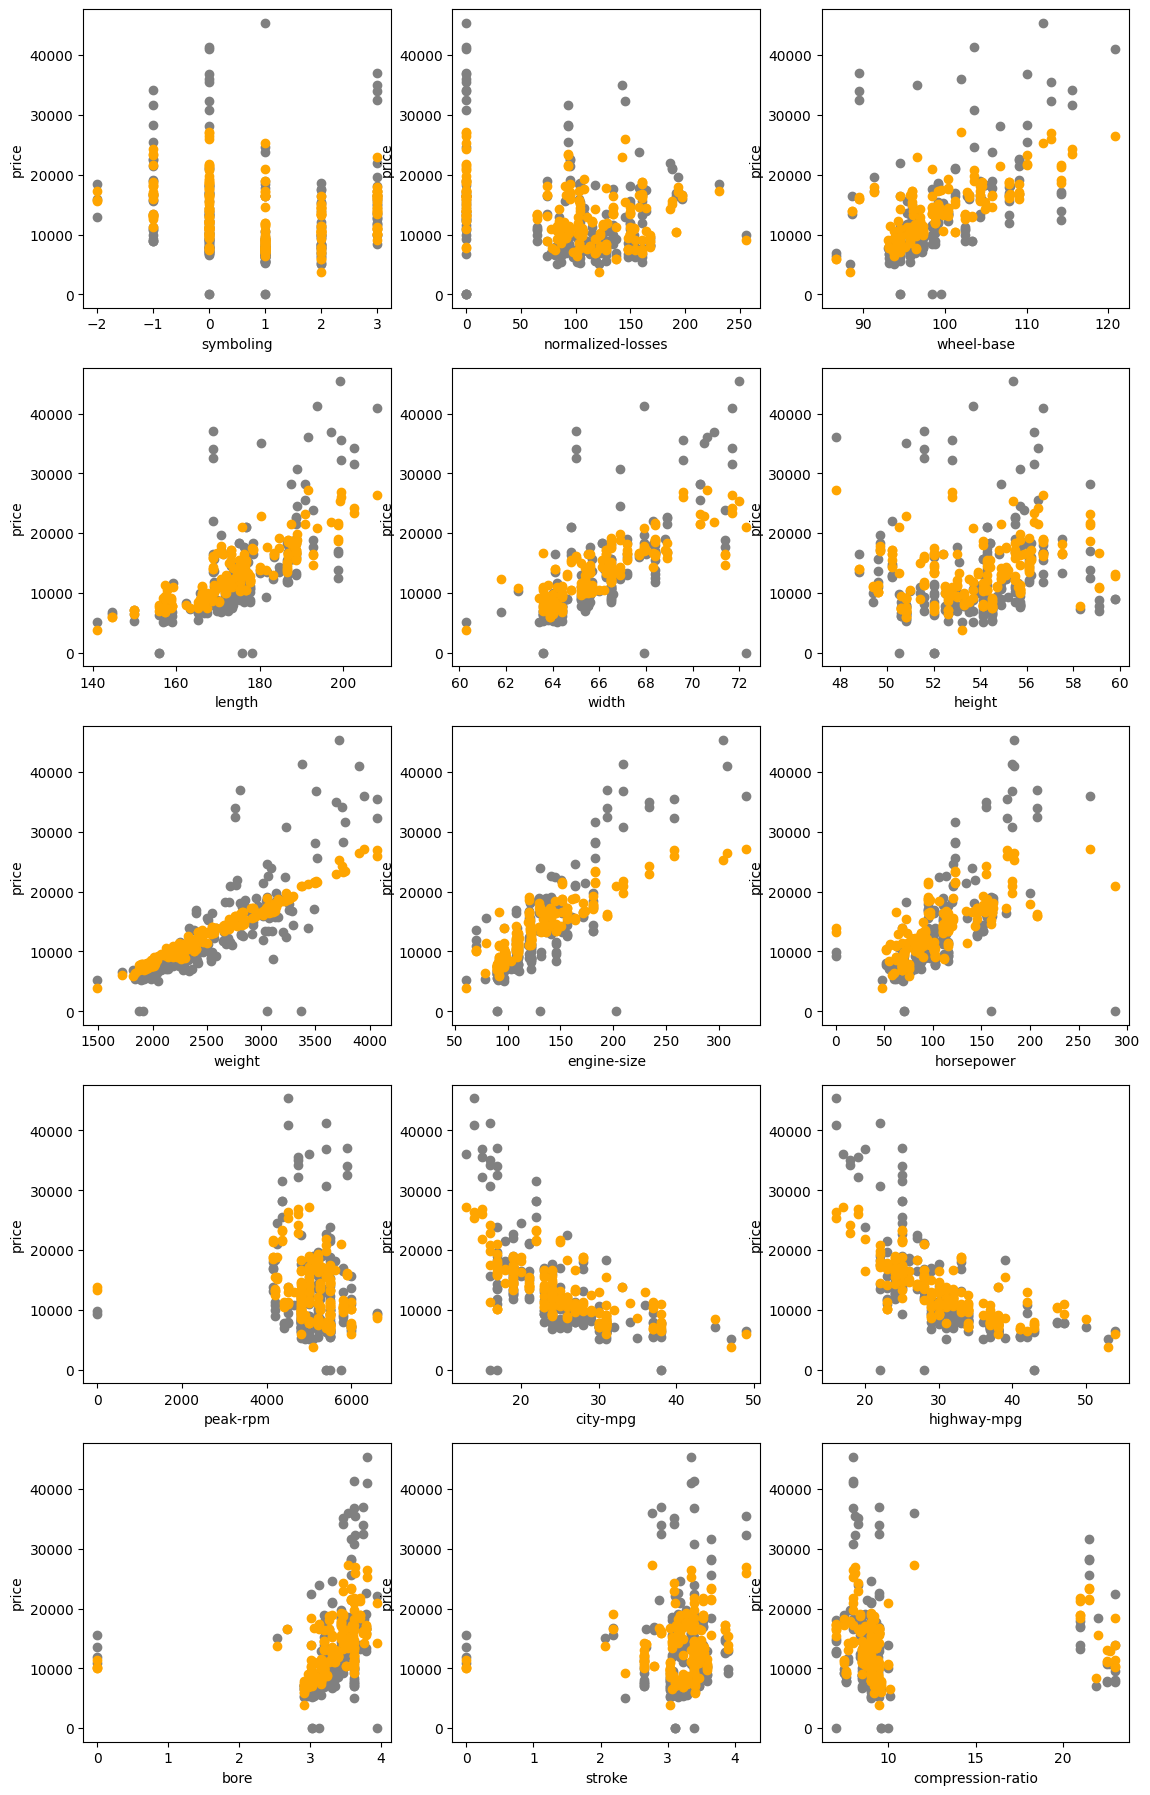

In [ ]:


batch_size=16

print(numeric_feature_names)
x_df=car_data[numeric_feature_names]
y_series=car_data['price']


train_input_fn = tf.estimator.inputs.pandas_input_fn(
    x=x_df,
    y=y_series,
    batch_size=batch_size,
    num_epochs=None,
    shuffle=True
)
eval_input_fn = tf.estimator.inputs.pandas_input_fn(
    x=x_df,
    y=y_series,
    batch_size=batch_size,
    shuffle=False
)

predict_input_fn = tf.estimator.inputs.pandas_input_fn(
    x=x_df,
    batch_size=batch_size,
    shuffle=False
)

epsilon = 0.000001


model_feature_columns = [
    tf.feature_column.numeric_column(feature_name ,
                                     normalizer_fn = lambda val: (val- x_df.mean()[feature_name] ) / (epsilon + x_df.std()[feature_name]))
    for feature_name in numeric_feature_names
]
print('model_feature_columns',model_feature_columns)

est = tf.estimator.DNNRegressor(
    feature_columns=model_feature_columns,
    hidden_units=[64],
    optimizer=tf.train.AdagradOptimizer(learning_rate=0.01),
  )
#TRAIN
num_print_statements = 10
num_training_steps =10000
for _ in range(num_print_statements):
  est.train(train_input_fn, steps=num_training_steps // num_print_statements)

  scores = est.evaluate(eval_input_fn)


  print('score',scores)

scatter_plot_inference_grid(est, x_df, numeric_feature_names)

تمرین3 :با ویژگی های دسته ای بسازcategorical features



*   categorical_column_with_ in go/tf-ops
*   dataframe[categorical_feature_name].unique()



In [ ]:
from pandas.core.arrays import categorical


batch_size=16

print(categorical_feature_names)
x_df=car_data[categorical_feature_names]
y_series=car_data['price']


train_input_fn = tf.estimator.inputs.pandas_input_fn(
    x=x_df,
    y=y_series,
    batch_size=batch_size,
    num_epochs=None,
    shuffle=True
)
eval_input_fn = tf.estimator.inputs.pandas_input_fn(
    x=x_df,
    y=y_series,
    batch_size=batch_size,
    shuffle=False
)

predict_input_fn = tf.estimator.inputs.pandas_input_fn(
    x=x_df,
    batch_size=batch_size,
    shuffle=False
)

epsilon = 0.000001


model_feature_columns = [
    tf.feature_column.indicator_column(
        tf.feature_column.categorical_column_with_vocabulary_list(
            feature_name, vocabulary_list=car_data[feature_name].unique()))
    for feature_name in categorical_feature_names
]
print('model_feature_columns',model_feature_columns)

est = tf.estimator.DNNRegressor(
    feature_columns=model_feature_columns,
    hidden_units=[64],
    optimizer=tf.train.AdagradOptimizer(learning_rate=0.01),
  )
#TRAIN
num_print_statements = 10
num_training_steps =10000
for _ in range(num_print_statements):
  est.train(train_input_fn, steps=num_training_steps // num_print_statements)

  scores = est.evaluate(eval_input_fn)


  print('score',scores)



['engine-type', 'num-doors', 'engine-location', 'num-cylinders', 'make', 'body-style', 'fuel-type', 'aspiration', 'drive-wheels', 'fuel-system']
model_feature_columns [IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='engine-type', vocabulary_list=('ohc', 'ohcf', 'l', 'dohc', 'ohcv', 'rotor', 'dohcv'), dtype=tf.string, default_value=-1, num_oov_buckets=0)), IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='num-doors', vocabulary_list=('four', 'two', '?'), dtype=tf.string, default_value=-1, num_oov_buckets=0)), IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='engine-location', vocabulary_list=('front', 'rear'), dtype=tf.string, default_value=-1, num_oov_buckets=0)), IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='num-cylinders', vocabulary_list=('four', 'six', 'five', 'twelve', 'two', 'eight', 'three'), dtype=tf.string, default_value=-1, num_oov_buckets=0)), IndicatorColumn(categorical_column=Voca

تمرین4: از تمام ویژگی  ها برای ساخت مدل استفاده کنید

In [ ]:
#@title Possible solution
# We have the full list of values that each feature takes on, and the list is
# relatively small so we use categorical_column_with_vocabulary_list.

batch_size = 16

x_df = car_data[numeric_feature_names + categorical_feature_names]
y_series = car_data['price']

train_input_fn = tf.estimator.inputs.pandas_input_fn(
    x=x_df,
    y=y_series,
    batch_size=batch_size,
    num_epochs=None,
    shuffle=True)

eval_input_fn = tf.estimator.inputs.pandas_input_fn(
    x=x_df,
    y=y_series,
    batch_size=batch_size,
    shuffle=False)

predict_input_fn = tf.estimator.inputs.pandas_input_fn(
    x=x_df,
    batch_size=batch_size,
    shuffle=False)
epsilon = 0.000001
model_feature_columns = [
    tf.feature_column.indicator_column(
        tf.feature_column.categorical_column_with_vocabulary_list(
            feature_name, vocabulary_list=car_data[feature_name].unique()))
    for feature_name in categorical_feature_names
] + [
    tf.feature_column.numeric_column(feature_name,
                                     normalizer_fn=lambda val: (val - x_df.mean()[feature_name]) / (epsilon + x_df.std()[feature_name]))
    for feature_name in numeric_feature_names
]
print('model_feature_columns', model_feature_columns)

est = tf.estimator.DNNRegressor(
    feature_columns=model_feature_columns,
    hidden_units=[64],
    optimizer=tf.train.AdagradOptimizer(learning_rate=0.01),
  )

# TRAIN
num_print_statements = 10
num_training_steps = 10000
for _ in range(num_print_statements):
  est.train(train_input_fn, steps=num_training_steps // num_print_statements)
  scores = est.evaluate(eval_input_fn)


  print('scores', scores)



model_feature_columns [IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='engine-type', vocabulary_list=('ohc', 'ohcf', 'l', 'dohc', 'ohcv', 'rotor', 'dohcv'), dtype=tf.string, default_value=-1, num_oov_buckets=0)), IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='num-doors', vocabulary_list=('four', 'two', '?'), dtype=tf.string, default_value=-1, num_oov_buckets=0)), IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='engine-location', vocabulary_list=('front', 'rear'), dtype=tf.string, default_value=-1, num_oov_buckets=0)), IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='num-cylinders', vocabulary_list=('four', 'six', 'five', 'twelve', 'two', 'eight', 'three'), dtype=tf.string, default_value=-1, num_oov_buckets=0)), IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='make', vocabulary_list=('volkswagen', 'toyota', 'subaru', 'mazda', 'porsche', 'mitsubishi', 'audi', 'dodge', 'pe

<ipython-input-59-cb7e151ac24c>:35: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  normalizer_fn=lambda val: (val - x_df.mean()[feature_name]) / (epsilon + x_df.std()[feature_name]))
<ipython-input-59-cb7e151ac24c>:35: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  normalizer_fn=lambda val: (val - x_df.mean()[feature_name]) / (epsilon + x_df.std()[feature_name]))
<ipython-input-59-cb7e151ac24c>:35: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addit

scores {'average_loss': 49754860.0, 'label/mean': 12949.43, 'loss': 784595900.0, 'prediction/mean': 13240.685, 'global_step': 1000}


<ipython-input-59-cb7e151ac24c>:35: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  normalizer_fn=lambda val: (val - x_df.mean()[feature_name]) / (epsilon + x_df.std()[feature_name]))
<ipython-input-59-cb7e151ac24c>:35: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  normalizer_fn=lambda val: (val - x_df.mean()[feature_name]) / (epsilon + x_df.std()[feature_name]))
<ipython-input-59-cb7e151ac24c>:35: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addit

scores {'average_loss': 43775596.0, 'label/mean': 12949.43, 'loss': 690307460.0, 'prediction/mean': 13149.345, 'global_step': 2000}


<ipython-input-59-cb7e151ac24c>:35: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  normalizer_fn=lambda val: (val - x_df.mean()[feature_name]) / (epsilon + x_df.std()[feature_name]))
<ipython-input-59-cb7e151ac24c>:35: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  normalizer_fn=lambda val: (val - x_df.mean()[feature_name]) / (epsilon + x_df.std()[feature_name]))
<ipython-input-59-cb7e151ac24c>:35: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addit

scores {'average_loss': 39273052.0, 'label/mean': 12949.43, 'loss': 619305860.0, 'prediction/mean': 13279.984, 'global_step': 3000}


<ipython-input-59-cb7e151ac24c>:35: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  normalizer_fn=lambda val: (val - x_df.mean()[feature_name]) / (epsilon + x_df.std()[feature_name]))
<ipython-input-59-cb7e151ac24c>:35: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  normalizer_fn=lambda val: (val - x_df.mean()[feature_name]) / (epsilon + x_df.std()[feature_name]))
<ipython-input-59-cb7e151ac24c>:35: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addit

scores {'average_loss': 35670724.0, 'label/mean': 12949.43, 'loss': 562499900.0, 'prediction/mean': 13246.864, 'global_step': 4000}


<ipython-input-59-cb7e151ac24c>:35: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  normalizer_fn=lambda val: (val - x_df.mean()[feature_name]) / (epsilon + x_df.std()[feature_name]))
<ipython-input-59-cb7e151ac24c>:35: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  normalizer_fn=lambda val: (val - x_df.mean()[feature_name]) / (epsilon + x_df.std()[feature_name]))
<ipython-input-59-cb7e151ac24c>:35: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addit

scores {'average_loss': 32835126.0, 'label/mean': 12949.43, 'loss': 517784700.0, 'prediction/mean': 13244.726, 'global_step': 5000}


<ipython-input-59-cb7e151ac24c>:35: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  normalizer_fn=lambda val: (val - x_df.mean()[feature_name]) / (epsilon + x_df.std()[feature_name]))
<ipython-input-59-cb7e151ac24c>:35: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  normalizer_fn=lambda val: (val - x_df.mean()[feature_name]) / (epsilon + x_df.std()[feature_name]))
<ipython-input-59-cb7e151ac24c>:35: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addit

scores {'average_loss': 30638952.0, 'label/mean': 12949.43, 'loss': 483152700.0, 'prediction/mean': 13114.651, 'global_step': 6000}


<ipython-input-59-cb7e151ac24c>:35: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  normalizer_fn=lambda val: (val - x_df.mean()[feature_name]) / (epsilon + x_df.std()[feature_name]))
<ipython-input-59-cb7e151ac24c>:35: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  normalizer_fn=lambda val: (val - x_df.mean()[feature_name]) / (epsilon + x_df.std()[feature_name]))
<ipython-input-59-cb7e151ac24c>:35: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addit

scores {'average_loss': 28933132.0, 'label/mean': 12949.43, 'loss': 456253250.0, 'prediction/mean': 13208.611, 'global_step': 7000}


<ipython-input-59-cb7e151ac24c>:35: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  normalizer_fn=lambda val: (val - x_df.mean()[feature_name]) / (epsilon + x_df.std()[feature_name]))
<ipython-input-59-cb7e151ac24c>:35: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  normalizer_fn=lambda val: (val - x_df.mean()[feature_name]) / (epsilon + x_df.std()[feature_name]))
<ipython-input-59-cb7e151ac24c>:35: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addit

scores {'average_loss': 27615044.0, 'label/mean': 12949.43, 'loss': 435468000.0, 'prediction/mean': 13167.942, 'global_step': 8000}


<ipython-input-59-cb7e151ac24c>:35: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  normalizer_fn=lambda val: (val - x_df.mean()[feature_name]) / (epsilon + x_df.std()[feature_name]))
<ipython-input-59-cb7e151ac24c>:35: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  normalizer_fn=lambda val: (val - x_df.mean()[feature_name]) / (epsilon + x_df.std()[feature_name]))
<ipython-input-59-cb7e151ac24c>:35: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addit

scores {'average_loss': 26599282.0, 'label/mean': 12949.43, 'loss': 419450200.0, 'prediction/mean': 13171.818, 'global_step': 9000}


<ipython-input-59-cb7e151ac24c>:35: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  normalizer_fn=lambda val: (val - x_df.mean()[feature_name]) / (epsilon + x_df.std()[feature_name]))
<ipython-input-59-cb7e151ac24c>:35: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  normalizer_fn=lambda val: (val - x_df.mean()[feature_name]) / (epsilon + x_df.std()[feature_name]))
<ipython-input-59-cb7e151ac24c>:35: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addit

scores {'average_loss': 25816528.0, 'label/mean': 12949.43, 'loss': 407106780.0, 'prediction/mean': 13145.152, 'global_step': 10000}
